In [5]:
import pandas as pd    #import essential libraries
import numpy as np
import re
import nltk   #for NLP preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [6]:
# Don't have dataset # The "review" column contains text, and "sentiment" is the target label.
data = {'review': [
    "I love this product! It's amazing and works perfectly.",
    "This is the worst purchase I've ever made. Total waste of money.",
    "Decent quality, but I expected better.",
    "Absolutely fantastic! Highly recommend to everyone.",
    "Not bad, but could be improved.",
    "Terrible experience. Will never buy again."
],
'sentiment': ['positive', 'negative', 'neutral', 'positive', 'neutral', 'negative']}

df = pd.DataFrame(data)
df.head()


,review,sentiment
0,I love this product! It's amazing and works pe...,positive
1,This is the worst purchase I've ever made. Tot...,negative
2,"Decent quality, but I expected better.",neutral
3,Absolutely fantastic! Highly recommend to ever...,positive
4,"Not bad, but could be improved.",neutral


In [8]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [12]:
import nltk
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [13]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')  # Add this line


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [14]:
lemmatizer = WordNetLemmatizer()    # Apply text cleaning, tokenization, stopword removal, and lemmatization.
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r'[^A-Za-z ]+', '', text)  # Remove special characters
    words = word_tokenize(text)  # Tokenization
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]  # Lemmatization & Stopword removal
    return " ".join(words)

df['cleaned_review'] = df['review'].apply(clean_text)
df.head()


,review,sentiment,cleaned_review
0,I love this product! It's amazing and works pe...,positive,love product amazing work perfectly
1,This is the worst purchase I've ever made. Tot...,negative,worst purchase ive ever made total waste money
2,"Decent quality, but I expected better.",neutral,decent quality expected better
3,Absolutely fantastic! Highly recommend to ever...,positive,absolutely fantastic highly recommend everyone
4,"Not bad, but could be improved.",neutral,bad could improved


In [15]:
tfidf = TfidfVectorizer(max_features=500)    #Convert Text into Numeric Form (TF-IDF)
X = tfidf.fit_transform(df['cleaned_review']).toarray()

# Encode Sentiment Labels (Positive → 1, Negative → 0, Neutral → 2)
sentiment_mapping = {'positive': 1, 'negative': 0, 'neutral': 2}
y = df['sentiment'].map(sentiment_mapping)


In [16]:
#Train a Machine Learning Model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)   #We’ll split the dataset into training & testing sets and use Naive Bayes, a common NLP classifier.

model = MultinomialNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.0

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       1.0
           2       0.00      0.00      0.00       0.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

<ipython-input-17-f3cc94958933>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['sentiment'], palette="coolwarm")


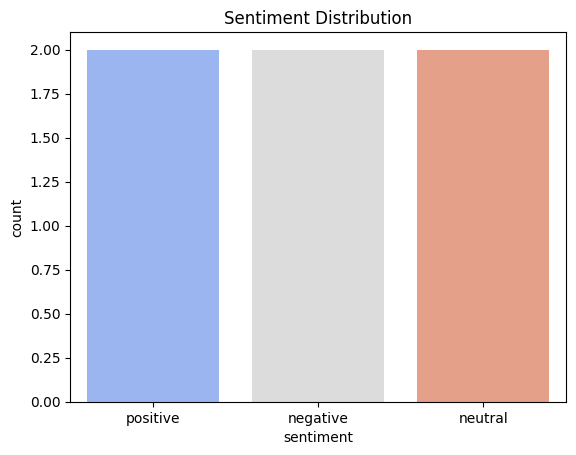

In [17]:
sns.countplot(x=df['sentiment'], palette="coolwarm")   #Visualizing Sentiment Results
plt.title("Sentiment Distribution")
plt.show()


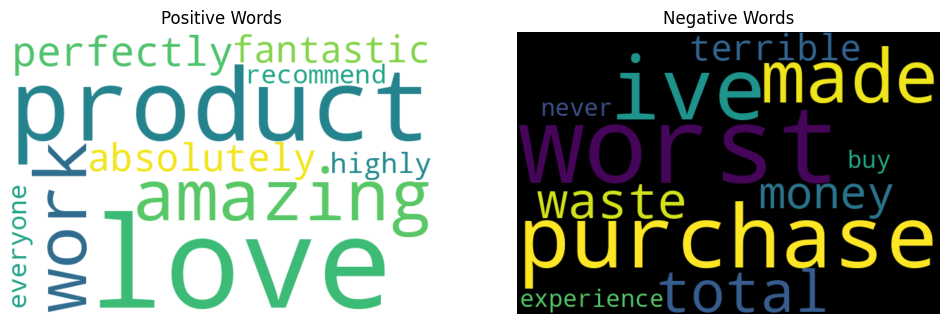

In [18]:
from wordcloud import WordCloud   # Word Cloud for Positive & Negative Words

positive_text = " ".join(df[df['sentiment'] == 'positive']['cleaned_review'])
negative_text = " ".join(df[df['sentiment'] == 'negative']['cleaned_review'])

wordcloud_pos = WordCloud(width=600, height=400, background_color='white').generate(positive_text)
wordcloud_neg = WordCloud(width=600, height=400, background_color='black').generate(negative_text)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_pos, interpolation="bilinear")
plt.axis("off")
plt.title("Positive Words")

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_neg, interpolation="bilinear")
plt.axis("off")
plt.title("Negative Words")

plt.show()


In [19]:
df['predicted_sentiment'] = model.predict(X)   #Save the predictions in a CSV file.
df.to_csv('sentiment_results.csv', index=False)
from google.colab import files
files.download('sentiment_results.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>